In [4]:
#generic import and constant definition list
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import astropy.constants as cons
from matplotlib.colors import LogNorm
import astropy.units as u
import pandas as pd
import scipy.optimize as opt
#all of the important fundamental constants are put into cgs units just for convenience
c=cons.c.cgs.value
G=cons.G.cgs.value
h=cons.h.cgs.value
hbar=cons.hbar.cgs.value
Msun=cons.M_sun.cgs.value
Rsun=cons.R_sun.cgs.value
Rearth=cons.R_earth.cgs.value
mp=cons.m_p.cgs.value
me=cons.m_e.cgs.value
mn=cons.m_n.cgs.value
kB=cons.k_B.cgs.value
mu_e=2 #mean mass per electron for He-core or C/O core composition
m_u = 1/cons.N_A.cgs.value #atomic mass unit in grams

In [5]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams["figure.dpi"] = 100

In [6]:
t0 = 4.55e17 #hubble time in seconds
h0 = 1/t0 #hubble time in Hertz

In [7]:
def dl_z(z,q0):
    #in regular units there would be a c*t0 as well but there's not one for baumann's choice of units
    return (z+0.5*(1-q0)*z**2)

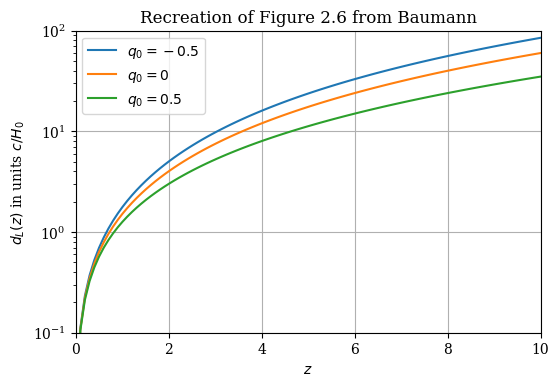

In [8]:
z = np.linspace(0,10,100)
dl = dl_z(z,-0.5)
plt.plot(z,dl,label="$q_0=-0.5$")

dl = dl_z(z,0)
plt.plot(z,dl,label="$q_0=0$")

dl = dl_z(z,0.5)
plt.plot(z,dl,label="$q_0=0.5$")
plt.ylabel("$d_L(z)$ in units $c/H_0$")
plt.xlabel("$z$")
plt.yscale('log')
plt.legend()
plt.title("Recreation of Figure 2.6 from Baumann")
plt.grid()
plt.ylim(0.1,100)
plt.xlim(0,10)
plt.show()

## Note:
I originally tried to do the following graphs just using the equation for d_p directly and then dividing it by 1+z but I found that the equation we have written for d_p directly results in negative values which doesn't make sense physically and also doesn't align with Baumann's graph. 

I figured that instead I could just do it the following way since logically 
$$d_L = d_p(1+z) \Rightarrow d_p=\frac{d_L}{1+z} \Rightarrow d_A = \frac{d_p}{1+z} = \frac{d_L}{(1+z)^2}$$

My reasoning for why maybe I was getting negative values is that realistically the approximations we made only hold for very small z but for bigger z you would have a $z^3$ term which would be positive and bring you back up, etc. etc.. But needless to say, take the following graph with a heaping of salt.

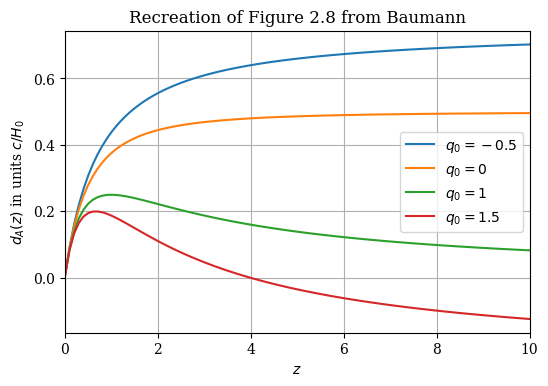

In [9]:
z = np.linspace(0,10,100)
dl = dl_z(z,-0.5)
plt.plot(z,dl/((1+z)**2),label="$q_0=-0.5$")

dl = dl_z(z,0)
plt.plot(z,dl/((1+z)**2),label="$q_0=0$")


dl = dl_z(z,1)
plt.plot(z,dl/((1+z)**2),label="$q_0=1$")

dl = dl_z(z,1.5)
plt.plot(z,dl/((1+z)**2),label="$q_0=1.5$")

plt.ylabel("$d_A(z)$ in units $c/H_0$")
plt.xlabel("$z$")
plt.legend()
plt.title("Recreation of Figure 2.8 from Baumann")
plt.grid()
plt.xlim(0,10)
plt.show()

As you can see above, I believe because of the limitations of our approximation, we need $q_0$ to be positive and around 1 in order to recover something close to what Baumann reports. Additionally, the manner in which I approached this problem makes it so that we can't do a fully correct treatment of the flat vs curved spacetime, but we can recover something roughly similar to what Baumann reports for the curved spacetime by simply setting $q_0$ to be larger.

## Below are my results using the equation for $d_p$ and consequently $d_A$ directly

In [10]:
def dp_z(z,q0):
    return z-0.5*(1+q0/2)*z**2
def da_z(z,q0):
    return dp_z(z,q0)/(1+z)

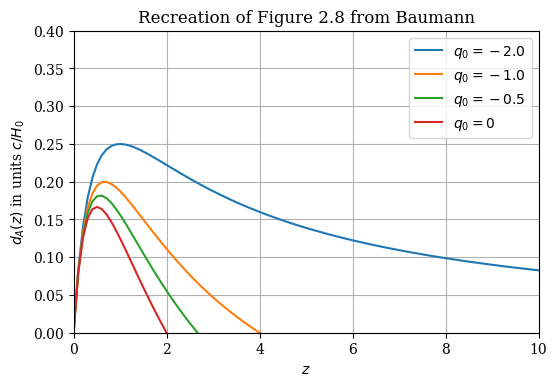

In [16]:
z = np.linspace(0,10,100)

dp = dp_z(z,-2.0)
plt.plot(z,dp/((1+z)**2),label="$q_0=-2.0$")

dp = dp_z(z,-1.0)
plt.plot(z,dp/((1+z)**2),label="$q_0=-1.0$")

dp = dp_z(z,-0.5)
plt.plot(z,dp/((1+z)**2),label="$q_0=-0.5$")

dp = dp_z(z,0)
plt.plot(z,dp/((1+z)**2),label="$q_0=0$")



plt.ylabel("$d_A(z)$ in units $c/H_0$")
plt.xlabel("$z$")
plt.legend()
plt.title("Recreation of Figure 2.8 from Baumann")
plt.grid()
plt.xlim(0,10)
plt.ylim(0,0.4)
plt.show()